In [85]:
## for data
import numpy as np
import pandas as pd
import collections
import json
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
## for text processing
import re
import nltk
## for language detection
import langdetect 
## for sentiment
from textblob import TextBlob
## for ner
import spacy
## for vectorizer
from sklearn import feature_extraction, manifold
## for word embedding
import gensim.downloader as gensim_api
## for topic modeling
import gensim
%matplotlib inline

In [86]:
df = pd.read_csv('datasets/train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [87]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [88]:
df.keyword.value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [89]:
df.location.value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# EDA

<AxesSubplot:xlabel='target'>

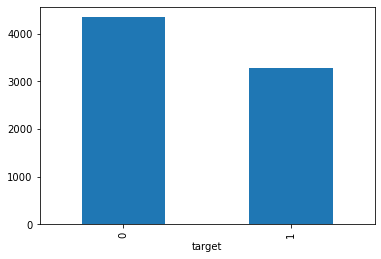

In [91]:
df.groupby('target')['id'].count().plot(kind='bar')

In [92]:
# Tweet is regarding Disaster
print("Tweet is regarding Disaster %.2f" % (df['target'].mean()*100))

Tweet is regarding Disaster 42.97


In [93]:
# Tweet is regarding Disaster
print("Tweet not regarding Disaster %.2f" % (100-df['target'].mean()*100))

Tweet not regarding Disaster 57.03


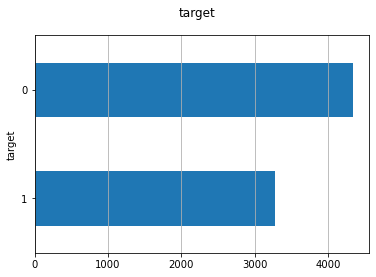

In [94]:
fig, ax = plt.subplots()
x="target"
fig.suptitle(x, fontsize=12)
df[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [95]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [96]:
txt = df.text.iloc[0]
langdetect.detect(txt)

'en'

#### There is only english language tweets so we will not make another column

In [97]:
print("---------original---------")
print(txt)

print("---------cleaning---------")
txt = re.sub(r'[^\w\s]', '', str(txt).lower().strip())
print(txt)

print("---------tokenization---------")
txt = txt.split()
print(txt)

---------original---------
Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
---------cleaning---------
our deeds are the reason of this earthquake may allah forgive us all
---------tokenization---------
['our', 'deeds', 'are', 'the', 'reason', 'of', 'this', 'earthquake', 'may', 'allah', 'forgive', 'us', 'all']


In [98]:
stopwords = nltk.corpus.stopwords.words("english")
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [99]:
print("---------remove stopwords---------")
txt = [word for word in txt if word not in stopwords]
print(txt)

---------remove stopwords---------
['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us']


In [100]:
print("---------Stemming---------")
ps = nltk.stem.PorterStemmer()
print([ps.stem(word) for word in txt])

---------Stemming---------
['deed', 'reason', 'earthquak', 'may', 'allah', 'forgiv', 'us']


In [101]:
print("---------Lemmatization---------")
lem = nltk.stem.WordNetLemmatizer()
print([lem.lemmatize(word) for word in txt])

---------Lemmatization---------
['deed', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'u']


In [102]:
def preprocess_text(txt, flg_stem=False, flg_lemmatize=False, stopwords=None):
    txt = re.sub(r'[^\w\s]', '', str(txt).lower().strip())
    
    result_txt = txt.split()
    
    if stopwords is not None:
        result_txt = [word for word in result_txt if word not in stopwords]
    
    if flg_stem:
        ps = nltk.stem.PorterStemmer()
        result_txt = [ps.stem(word) for word in result_txt]
    
    if flg_lemmatize:
        lem = nltk.stem.WordNetLemmatizer()
        result_txt = [lem.lemmatize(word) for word in result_txt]
    
    txt = " ".join(result_txt)
    return txt

In [103]:
df["clean_text"] = df["text"].apply(lambda x: preprocess_text(x, flg_stem=False, flg_lemmatize=True, stopwords=stopwords))
df.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...


In [104]:
df["word_count"] = df["text"].apply(lambda x: len(str(x).split(" ")))
df["char_count"] = df["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df["sentence_count"] = df["text"].apply(lambda x: len(str(x).split(".")))
df["avg_word_length"] = df["char_count"] / df["word_count"]
df["avg_sentence_length"] =  df["word_count"] / df["sentence_count"]
df.head()

,id,keyword,location,text,target,clean_text,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,13,57,1,4.384615,13.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7,32,2,4.571429,3.5
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,22,112,2,5.090909,11.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,9,57,1,6.333333,9.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,17,72,1,4.235294,17.0


In [105]:
df.iloc[0]

id                                                                     1
keyword                                                              NaN
location                                                             NaN
text                   Our Deeds are the Reason of this #earthquake M...
target                                                                 1
clean_text                    deed reason earthquake may allah forgive u
word_count                                                            13
char_count                                                            57
sentence_count                                                         1
avg_word_length                                                 4.384615
avg_sentence_length                                                 13.0
Name: 0, dtype: object

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms)

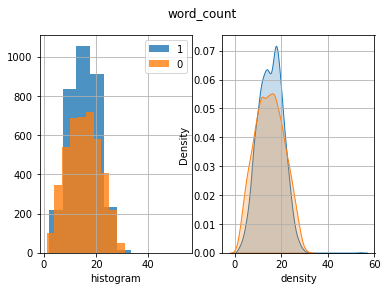

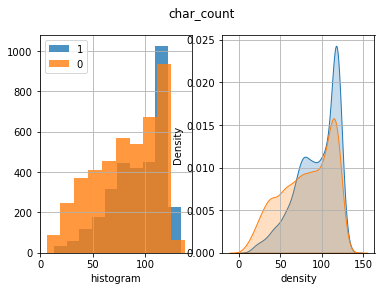

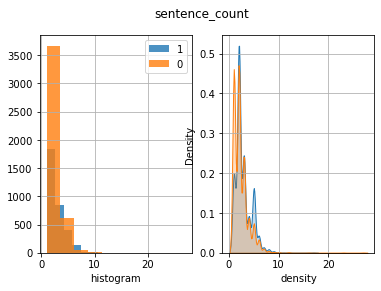

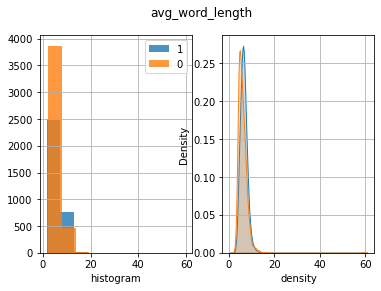

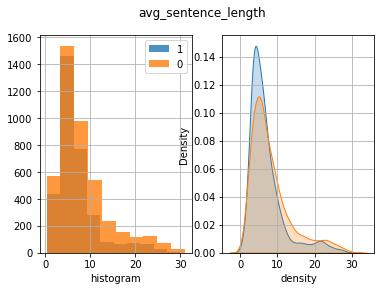

In [106]:
features = ["word_count", "char_count", "sentence_count", "avg_word_length", "avg_sentence_length"]
y = "target"

for i in range(len(features)):
    x = features[i]
    fig, ax = plt.subplots(nrows=1, ncols=2)
    fig.suptitle(x, fontsize=12)
    for j in df[y].unique():
        sns.distplot(df[df[y]==j][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
        sns.distplot(df[df[y]==j][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
    ax[0].grid(True)
    ax[0].legend(df[y].unique())
    ax[1].grid(True)
plt.show()

In [107]:
df["sentiment"] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

,id,keyword,location,text,target,clean_text,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,sentiment
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,13,57,1,4.384615,13.0,0.00000
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7,32,2,4.571429,3.5,0.10000
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,22,112,2,5.090909,11.0,-0.01875
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,9,57,1,6.333333,9.0,0.00000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,17,72,1,4.235294,17.0,0.00000


In [108]:
df.iloc[0]

id                                                                     1
keyword                                                              NaN
location                                                             NaN
text                   Our Deeds are the Reason of this #earthquake M...
target                                                                 1
clean_text                    deed reason earthquake may allah forgive u
word_count                                                            13
char_count                                                            57
sentence_count                                                         1
avg_word_length                                                 4.384615
avg_sentence_length                                                 13.0
sentiment                                                            0.0
Name: 0, dtype: object

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms)

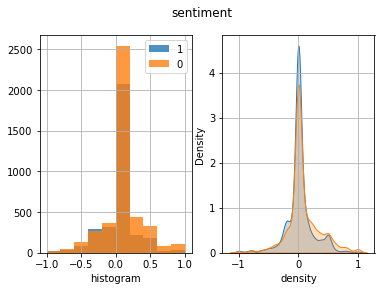

In [109]:
x, y = "sentiment", "target"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for j in df[y].unique():
    sns.distplot(df[df[y]==j][x], hist=True, kde=False, 
             bins=10, hist_kws={"alpha":0.8}, 
             axlabel="histogram", ax=ax[0])
    sns.distplot(df[df[y]==j][x], hist=False, kde=True, 
             kde_kws={"shade":True}, axlabel="density",   
             ax=ax[1])
ax[0].grid(True)
ax[0].legend(df[y].unique())
ax[1].grid(True)

In [110]:
# !python -m spacy download en_core_web_sm

In [111]:
ner = spacy.load("en_core_web_sm")

In [112]:
txt = df["text"].iloc[1]
doc = ner(txt)

In [113]:
spacy.displacy.render(doc, style="ent")

In [114]:
df["tags"] = df["text"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )
df.head()

,id,keyword,location,text,target,clean_text,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,sentiment,tags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,13,57,1,4.384615,13.0,0.00000,"[(May, DATE)]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7,32,2,4.571429,3.5,0.10000,"[(La Ronge Sask, FAC), (Canada, GPE)]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,22,112,2,5.090909,11.0,-0.01875,[]
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,9,57,1,6.333333,9.0,0.00000,"[(13,000, CARDINAL), (#, CARDINAL), (Californi..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,17,72,1,4.235294,17.0,0.00000,"[(Ruby, GPE), (Alaska, GPE), (#, CARDINAL)]"


In [115]:
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

In [116]:
df["tags"] = df["tags"].apply(lambda x: utils_lst_count(x))
df.head()

,id,keyword,location,text,target,clean_text,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,sentiment,tags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,13,57,1,4.384615,13.0,0.00000,"[{('May', 'DATE'): 1}]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7,32,2,4.571429,3.5,0.10000,"[{('La Ronge Sask', 'FAC'): 1}, {('Canada', 'G..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,22,112,2,5.090909,11.0,-0.01875,[]
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,9,57,1,6.333333,9.0,0.00000,"[{('13,000', 'CARDINAL'): 1}, {('#', 'CARDINAL..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,17,72,1,4.235294,17.0,0.00000,"[{('Ruby', 'GPE'): 1}, {('Alaska', 'GPE'): 1},..."


In [117]:
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0


In [118]:
tags_set = []
for lst in df["tags"].tolist():
     for dic in lst:
        for k in dic.keys():
            tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     df["tags_"+feature] = df["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))

In [119]:
df.head()

,id,keyword,location,text,target,clean_text,word_count,char_count,sentence_count,avg_word_length,...,tags_GPE,tags_QUANTITY,tags_FAC,tags_ORDINAL,tags_CARDINAL,tags_DATE,tags_PERCENT,tags_EVENT,tags_ORG,tags_LOC
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,13,57,1,4.384615,...,0,0,0,0,0,1,0,0,0,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7,32,2,4.571429,...,1,0,1,0,0,0,0,0,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,22,112,2,5.090909,...,0,0,0,0,0,0,0,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,9,57,1,6.333333,...,1,0,0,0,2,0,0,0,0,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,17,72,1,4.235294,...,2,0,0,0,1,0,0,0,0,0


In [120]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'clean_text',
       'word_count', 'char_count', 'sentence_count', 'avg_word_length',
       'avg_sentence_length', 'sentiment', 'tags', 'tags_NORP',
       'tags_LANGUAGE', 'tags_MONEY', 'tags_PRODUCT', 'tags_TIME', 'tags_LAW',
       'tags_PERSON', 'tags_WORK_OF_ART', 'tags_GPE', 'tags_QUANTITY',
       'tags_FAC', 'tags_ORDINAL', 'tags_CARDINAL', 'tags_DATE',
       'tags_PERCENT', 'tags_EVENT', 'tags_ORG', 'tags_LOC'],
      dtype='object')

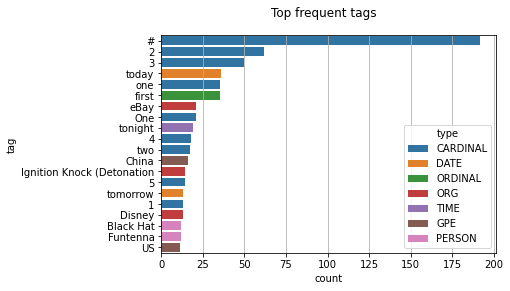

In [121]:
y = 0
 
tags_list = df[df["target"]==y]["tags"].sum()
map_lst = list(map(lambda x: list(x.keys())[0], tags_list))
df_tags = pd.DataFrame(map_lst, columns=['tag','type'])
df_tags["count"] = 1
df_tags = df_tags.groupby(['type',  
                'tag']).count().reset_index().sort_values("count", 
                 ascending=False)
fig, ax = plt.subplots()
fig.suptitle("Top frequent tags", fontsize=12)
sns.barplot(x="count", y="tag", hue="type", 
            data=df_tags.iloc[:20,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

In [122]:
txt = df["text"].iloc[1]
entities = ner(txt).ents

tagged_txt = txt
for tag in entities:
    tagged_txt = re.sub(tag.text, "_".join(tag.text.split()), 
                        tagged_txt) 
    
print(tagged_txt)

Forest fire near La_Ronge_Sask. Canada


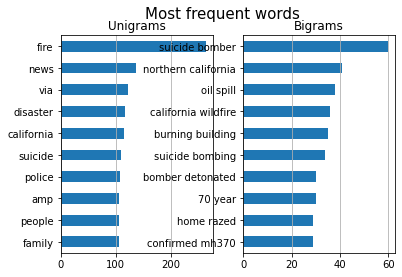

In [123]:
y = 1
corpus = df[df["target"]==y]["clean_text"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)


## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
df_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
df_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)


## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
df_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
df_bi["Word"] = df_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
df_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

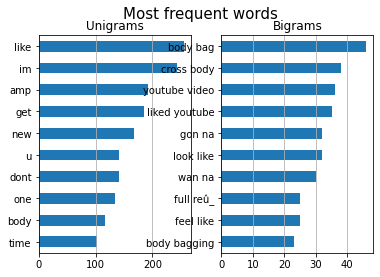

In [124]:
y = 0
corpus = df[df["target"]==y]["clean_text"]
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)


## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
df_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
df_uni.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)


## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
df_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
df_bi["Word"] = df_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
df_bi.set_index("Word").iloc[:10,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

In [125]:
words = ["fire", "news", "disaster", "suicide bomber", "oil spill", "california wildfire"]

## count
grams = [len(word.split(" ")) for word in words]
vectorizer = feature_extraction.text.CountVectorizer(
                 vocabulary=words, 
                 ngram_range=(min(grams),max(grams)))
df_X = pd.DataFrame(vectorizer.fit_transform(df["clean_text"]).todense(), columns=words)

## add the new features as columns
df = pd.concat([df, df_X.set_index(df.index)], axis=1)
df.head()

,id,keyword,location,text,target,clean_text,word_count,char_count,sentence_count,avg_word_length,...,tags_PERCENT,tags_EVENT,tags_ORG,tags_LOC,fire,news,disaster,suicide bomber,oil spill,california wildfire
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,13,57,1,4.384615,...,0,0,0,0,0,0,0,0,0,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,7,32,2,4.571429,...,0,0,0,0,1,0,0,0,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,22,112,2,5.090909,...,0,0,0,0,0,0,0,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,9,57,1,6.333333,...,0,0,0,0,0,0,0,0,0,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,17,72,1,4.235294,...,0,0,0,0,0,0,0,0,0,0


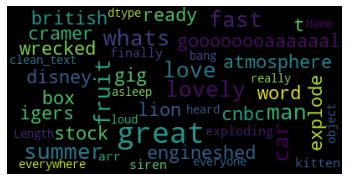

In [126]:
wc = wordcloud.WordCloud(background_color='black', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [44]:
# from tqdm import tqdm
# vecs = []
# for text in tqdm(list(df['clean_text'])):
#     doc = ner(text) 
#     mean_vec = np.zeros([len(doc), len(doc[0].vector)])
#     for word in doc:
#         # word2vec
#         vec = word.vector
#         # fetch df score
#         try:
#             idf = word2tfidf[str(word)]
#         except:
#             #print word
#             idf = 0
#         # compute final vec
#         mean_vec += vec * idf
#     mean_vec = mean_vec.mean(axis=0)
#     vecs.append(mean_vec)

100%|█████████████████████████████████████████████████████████████████████████████| 7613/7613 [00:38<00:00, 196.33it/s]


In [45]:
# df_vector = pd.DataFrame(vecs, index= df.index)
# df_vector['id'] = df['id']
# df_vector.columns = df_vector.columns.astype('str')
# df_vector.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [46]:
# df_full  = df.merge(df_vector, on='id',how='left')

In [128]:
# del df_full['text']
# del df_full['clean_text']
# del df_full['id']
# del df_full['tags']
# del df_full['location']
# del df_full['keyword']

del df['text']
del df['clean_text']
del df['id']
del df['tags']
del df['location']
del df['keyword']

In [129]:
df_full =  df.copy()

In [130]:
df_full.head()

,target,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,sentiment,tags_NORP,tags_LANGUAGE,tags_MONEY,...,tags_PERCENT,tags_EVENT,tags_ORG,tags_LOC,fire,news,disaster,suicide bomber,oil spill,california wildfire
0,1,13,57,1,4.384615,13.0,0.00000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,7,32,2,4.571429,3.5,0.10000,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,22,112,2,5.090909,11.0,-0.01875,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,9,57,1,6.333333,9.0,0.00000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,17,72,1,4.235294,17.0,0.00000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
df_full.columns.str.replace(" ", "_")
list(df_full.columns)

['target',
 'word_count',
 'char_count',
 'sentence_count',
 'avg_word_length',
 'avg_sentence_length',
 'sentiment',
 'tags_NORP',
 'tags_LANGUAGE',
 'tags_MONEY',
 'tags_PRODUCT',
 'tags_TIME',
 'tags_LAW',
 'tags_PERSON',
 'tags_WORK_OF_ART',
 'tags_GPE',
 'tags_QUANTITY',
 'tags_FAC',
 'tags_ORDINAL',
 'tags_CARDINAL',
 'tags_DATE',
 'tags_PERCENT',
 'tags_EVENT',
 'tags_ORG',
 'tags_LOC',
 'fire',
 'news',
 'disaster',
 'suicide bomber',
 'oil spill',
 'california wildfire']

In [132]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df_full, test_size=0.2, random_state=7)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=7)

In [133]:
X_full_train = df_full_train.iloc[:, 1:].values
X_train = df_train.iloc[:, 1:].values
X_val = df_val.iloc[:, 1:].values
X_test = df_test.iloc[:, 1:].values

In [134]:
y_full_train = df_full_train.iloc[:, 0].values
y_train = df_train.iloc[:, 0].values
y_val = df_val.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

# Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [136]:
y_pred = log_model.predict_proba(X_val)[:, 1]
y_pred

array([0.49405188, 0.65819187, 0.79356103, ..., 0.2011591 , 0.22974792,
       0.40810243])

In [137]:
(y_val == (y_pred >=0.5 ).astype('int')).mean()

0.6808929743926461

In [138]:
from sklearn.metrics import roc_curve
fpr_log, tpr_log, thresholds_log = roc_curve(y_val, y_pred)

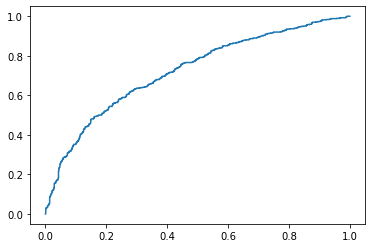

In [139]:
plt.plot(fpr_log, tpr_log, label='actual')

# Descision Tree Classifier

In [140]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [141]:
y_pred = dt.predict_proba(X_val)[:, 1]
y_pred

array([0., 1., 0., ..., 0., 1., 0.])

In [142]:
(y_val == (y_pred >=0.5 ).astype('int')).mean()

0.6369008535784636

In [143]:
from sklearn.metrics import roc_curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_val, y_pred)

# Random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=1)

In [145]:
y_pred = rf.predict_proba(X_val)[:, 1]
y_pred

array([0.4 , 0.5 , 0.55, ..., 0.25, 0.7 , 0.55])

In [146]:
(y_val == (y_pred >=0.5 ).astype('int')).mean()

0.6657912015758372

In [147]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_pred)

# XGBoost

In [148]:
import xgboost as xgb

In [149]:
features = list(df_train.columns)[1:]

In [150]:
for i in range(0, len(features)):
    if ' ' in features[i]:
        features[i] = features[i].replace(" ", "_")

In [151]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names = features)

In [152]:
xgb_params = {
    'eta' : 0.3,
    'max_depth' : 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 5,
    
    'seed': 1,
    'verbosity': 1
}

In [153]:
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [154]:
y_pred = xgb_model.predict(dval)
y_pred

array([0.525179  , 0.506157  , 0.56659913, ..., 0.29866096, 0.25831446,
       0.4911616 ], dtype=float32)

In [155]:
(y_val == (y_pred >=0.5 ).astype('int')).mean()

0.6881155613919895

In [156]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_val, y_pred)

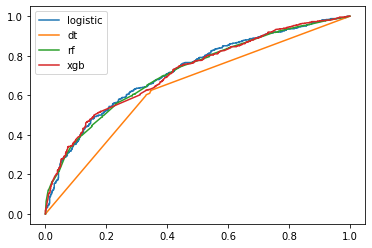

In [157]:
plt.plot(fpr_log, tpr_log, label='logistic')
plt.plot(fpr_dt, tpr_dt, label='dt')
plt.plot(fpr_rf, tpr_rf, label='rf')
plt.plot(fpr_xgb, tpr_xgb, label='xgb')
plt.legend()

In [158]:
y_pred = log_model.predict_proba(X_test)[:, 1]
fpr_log_test, tpr_log_test, thresholds_log_test = roc_curve(y_test, y_pred)

y_pred = dt.predict_proba(X_test)[:, 1]
fpr_dt_test, tpr_dt_test, thresholds_dt_test = roc_curve(y_test, y_pred)

y_pred = rf.predict_proba(X_test)[:, 1]
fpr_rf_test, tpr_rf_test, thresholds_rf_test = roc_curve(y_test, y_pred)

dtest = xgb.DMatrix(X_val, label=y_val, feature_names = features)
y_pred = xgb_model.predict(dtest)
fpr_xgb_test, tpr_xgb_test, thresholds_xgb_test = roc_curve(y_test, y_pred)

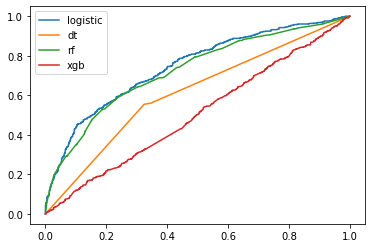

In [159]:
plt.plot(fpr_log_test, tpr_log_test, label='logistic')
plt.plot(fpr_dt_test, tpr_dt_test, label='dt')
plt.plot(fpr_rf_test, tpr_rf_test, label='rf')
plt.plot(fpr_xgb_test, tpr_xgb_test, label='xgb')
plt.legend()

### Okay the roc curve for validation dataset is almost same for all algorithms.
### The ROC curve for test dataset looks more close to ideal roc curve looks is close logistic regression adn random forest. So I will proceed with hyperparameter tuning for these models
### Also going forward I will also look at precision and recall and also the ROC. Like more focus should be given to decrease the number of False Negatives as if a tweet is of related to disaster we want it to be classified as disaster

# Logistic Regression Parameter Tuning

In [160]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [161]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2', 'l1']
c_values = [100, 10, 1.0, 0.1, 0.01]


grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver newton-cg supports only 'l2' or 

Best: 0.755255 using {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}


In [162]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 10, shuffle=True, random_state=1)
from tqdm.auto import tqdm
auc_scores = []
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    X_train = df_train.iloc[:, 1:].values
    X_val = df_val.iloc[:, 1:].values
    
    y_train = df_train.iloc[:, 0].values
    y_val = df_val.iloc[:, 0].values
    
    log_model = LogisticRegression(C= 1.0, penalty= 'l1', solver= 'liblinear')
    log_model.fit(X_train, y_train)
    
    
    y_pred = log_model.predict_proba(X_val)[:, 1]
    
    
    auc = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc)

0it [00:00, ?it/s]

In [163]:
np.mean(auc_scores), np.std(auc_scores)

(0.7486155283843243, 0.01880828030730975)

# Random Forest Parameter Tuning

In [164]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [165]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
n_estimators =[5, 10, 20, 40, 80, 100, 150, 200]
depth = [5, 10, 15, 20, 25]


grid = dict(n_estimators=n_estimators,max_depth=depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
grid_result = grid_search.fit(X_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.768055 using {'max_depth': 15, 'n_estimators': 200}


In [166]:
n_estimator=200
max_depth=15

In [167]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 10, shuffle=True, random_state=1)
from tqdm.auto import tqdm
auc_scores = []
for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    X_train = df_train.iloc[:, 1:].values
    X_val = df_val.iloc[:, 1:].values
    
    y_train = df_train.iloc[:, 0].values
    y_val = df_val.iloc[:, 0].values
    
    rf = RandomForestClassifier(n_estimators= n_estimator, max_depth= max_depth)
    rf.fit(X_train, y_train)
    
    
    y_pred = rf.predict_proba(X_val)[:, 1]
    
    
    auc = roc_auc_score(y_val, y_pred)
    auc_scores.append(auc)

0it [00:00, ?it/s]

In [168]:
np.mean(auc_scores), np.std(auc_scores)

(0.7707011657556121, 0.020295726478687368)

#### The auc score is better for RandomForestClassifier so we will go with this for now

# Testing Model

In [169]:
n_estimator=200
max_depth=15

In [170]:
X_full_train = df_full_train.iloc[:, 1:].values
X_test = df_test.iloc[:, 1:].values

y_full_train = df_full_train.iloc[:, 0].values
y_test = df_test.iloc[:, 0].values

In [217]:
final_model = RandomForestClassifier(n_estimators= n_estimator, max_depth= max_depth)
final_model.fit(X_full_train, y_full_train)

RandomForestClassifier(max_depth=15, n_estimators=200)

In [193]:
y_pred = final_model.predict_proba(X_test)[:, 1]

In [194]:
roc_auc_score(y_test, y_pred)

0.757892354495405

In [195]:
from sklearn.metrics import roc_curve

In [196]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

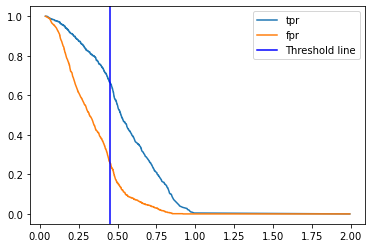

In [201]:
plt.plot(thresholds, tpr, label='tpr')
plt.plot(thresholds, fpr, label='fpr')
plt.axvline(x = 0.45, color = 'b', label = 'Threshold line')
plt.legend()

In [215]:
threshold=0.40

In [216]:
y_pred = final_model.predict_proba(X_test)[:, 1] 
y_pred = (y_pred >=threshold ).astype('int')

#tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0])
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[538, 323],
       [170, 492]], dtype=int64)

# Saving Model

In [209]:
import pickle

In [210]:
output_file = f'rf_n_estimator={n_estimator}_depth={max_depth}.bin'
output_file

'rf_n_estimator=200_depth=15.bin'

In [218]:
with open(output_file, 'wb') as f_out:
    pickle.dump((threshold, tags_set, vectorizer, final_model), f_out)

# Deployment

In [5]:
import requests
tweet = {"text" : "Forest fire near La Ronge Sask. Canada"}
url = "http://127.0.0.1:9696/predict"
requests.post(url, json=tweet) 

<Response [500]>